In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2>Scraping data from openweathermap.org</h2>

In [58]:
# Defining my openaq API key:
my_key = "d9dbb68700eae72022b2d50c406528f8"

In [59]:
import requests

In [60]:
# API result for Chicago to test
base_url = "https://api.openweathermap.org/data/2.5/weather"

chi = requests.get(base_url, params = {"q":"Chicago,IL,US", "appid":my_key}).json()
chi

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 258.9,
  'feels_like': 251.9,
  'temp_min': 258.9,
  'temp_max': 258.9,
  'pressure': 1029,
  'humidity': 66,
  'sea_level': 1029,
  'grnd_level': 1004},
 'visibility': 10000,
 'wind': {'speed': 4.74, 'deg': 282, 'gust': 9.82},
 'clouds': {'all': 99},
 'dt': 1768872089,
 'sys': {'country': 'US', 'sunrise': 1768828411, 'sunset': 1768862927},
 'timezone': -21600,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [61]:
coord = chi["coord"]
main = chi["main"]
coord
main

{'temp': 258.9,
 'feels_like': 251.9,
 'temp_min': 258.9,
 'temp_max': 258.9,
 'pressure': 1029,
 'humidity': 66,
 'sea_level': 1029,
 'grnd_level': 1004}

In [62]:
base_url = "http://api.openweathermap.org/data/2.5/air_pollution"

chi_data = requests.get(base_url, params = {"lat":coord["lat"], "lon":coord["lon"], "appid": my_key}).json()
chi_list = chi_data['list'][0]

chi_aqi = chi_list['main']['aqi']

print(f" Chicago's air quality index is {chi_aqi}")

 Chicago's air quality index is 2


In [63]:
chi_data

{'coord': {'lon': -87.65, 'lat': 41.85},
 'list': [{'main': {'aqi': 2},
   'components': {'co': 155.2,
    'no': 0,
    'no2': 4.21,
    'o3': 81.46,
    'so2': 2.26,
    'pm2_5': 1.11,
    'pm10': 1.34,
    'nh3': 0.57},
   'dt': 1768872367}]}

In [64]:
chi_list

{'main': {'aqi': 2},
 'components': {'co': 155.2,
  'no': 0,
  'no2': 4.21,
  'o3': 81.46,
  'so2': 2.26,
  'pm2_5': 1.11,
  'pm10': 1.34,
  'nh3': 0.57},
 'dt': 1768872367}

In [65]:
chicago = chi['main'] | chi_list['components']
chicago['name'] = "Chicago"
chicago['coordinates'] = chi['coord']
chicago['aqi'] = chi_aqi

In [66]:
pd.DataFrame(chicago, index = ["cityname"])

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,co,no,no2,o3,so2,pm2_5,pm10,nh3,name,coordinates,aqi
cityname,258.9,251.9,258.9,258.9,1029,66,1029,1004,155.2,0,4.21,81.46,2.26,1.11,1.34,0.57,Chicago,NaN,2


In [67]:
#Building a dataframe of weather data for several US cities
cities = [
    'Chicago,IL,US',
    'Boston,MA,US',
    'Austin,TX,US',
    'New York City,NY,US',
    'Atlanta,GA,US',
    'Los Angeles,CA,US',
    'Seattle,WA,US',
    'Minneapolis,MN,US',
    'Denver,CO,US',
    'Washington,DC,US'
]

In [68]:
cities_data = []
for city in cities:
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    city_data = requests.get(base_url, params = {"q":city, "appid":my_key}).json()

    lat = city_data["coord"]["lat"]
    lon = city_data["coord"]["lon"]
    aqi_url = "http://api.openweathermap.org/data/2.5/air_pollution"
    aqi_data = requests.get(aqi_url, params = {"lat":lat, "lon":lon, "appid": my_key}).json()
    aqi_list = aqi_data['list'][0]
    
    combined_row = city_data['main'] | aqi_list['components']
    combined_row['city_name'] = city
    combined_row['lat'] = lat
    combined_row['lon'] = lon
    combined_row['aqi'] = aqi_list['main']['aqi']
    
    cities_data.append(combined_row)

In [69]:
df = pd.DataFrame(cities_data)
df = df.set_index('city_name')
df

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,co,no,no2,o3,so2,pm2_5,pm10,nh3,lat,lon,aqi
city_name,,,,,,,,,,,,,,,,,,,
"Chicago,IL,US",258.90,251.90,258.90,258.90,1029,66,1029,1004,155.20,0.00,4.21,81.46,2.26,1.11,1.34,0.57,41.8500,-87.6500,2
"Boston,MA,US",269.98,264.46,269.98,269.98,1015,83,1015,1010,219.23,0.00,17.15,55.65,5.55,8.78,11.62,0.69,42.3584,-71.0598,1
"Austin,TX,US",284.11,282.41,284.11,284.11,1024,44,1024,999,151.66,0.00,5.08,107.06,1.36,4.25,6.46,0.99,30.2672,-97.7431,3
"New York City,NY,US",271.13,265.00,271.13,271.13,1018,76,1018,1016,190.14,0.00,10.03,68.24,3.34,5.59,7.39,1.07,40.7143,-74.0060,2
"Atlanta,GA,US",276.18,272.34,276.18,276.18,1027,45,1027,991,165.54,0.00,4.83,80.06,0.74,3.42,4.28,1.57,33.7490,-84.3880,2
"Los Angeles,CA,US",294.94,293.93,294.94,294.94,1014,29,1014,995,296.07,0.09,4.71,120.92,1.68,43.66,52.91,0.15,34.0522,-118.2437,3
"Seattle,WA,US",277.37,276.36,277.37,277.37,1024,88,1024,1014,273.23,0.35,16.77,37.46,1.12,5.31,7.68,1.13,47.6062,-122.3321,1
"Minneapolis,MN,US",255.88,248.88,255.88,255.88,1028,82,1028,992,161.93,0.00,4.04,79.19,0.61,1.49,1.66,1.39,44.9800,-93.2638,2
"Denver,CO,US",273.58,270.64,273.58,273.58,1020,63,1020,838,122.33,0.00,3.98,66.02,0.47,1.36,1.72,0.25,39.7392,-104.9847,2


<h2>Forecasting weather for NYC</h2>

In [70]:
forecast_url = "https://api.openweathermap.org/data/2.5/forecast"
forecast_ny = requests.get(forecast_url, params = {
    "q": "New York City,NY,US",  
    "appid": my_key
}).json()

In [71]:
forecast_ny

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1768878000,
   'main': {'temp': 270.68,
    'feels_like': 263.84,
    'temp_min': 269.51,
    'temp_max': 270.68,
    'pressure': 1018,
    'sea_level': 1018,
    'grnd_level': 1017,
    'humidity': 76,
    'temp_kf': 1.17},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 44},
   'wind': {'speed': 7.48, 'deg': 266, 'gust': 12.08},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2026-01-20 03:00:00'},
  {'dt': 1768888800,
   'main': {'temp': 268.26,
    'feels_like': 261.26,
    'temp_min': 266.76,
    'temp_max': 268.26,
    'pressure': 1020,
    'sea_level': 1020,
    'grnd_level': 1019,
    'humidity': 76,
    'temp_kf': 1.5},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 58},
   'wind': {'speed': 6.5, 'deg': 268, 'gust': 10.45},
   

In [72]:
rows = []
for entry in forecast_ny['list']:
    rows.append({
        'date': entry['dt_txt'],
        'temperature': entry['main']['temp']
    })

df_final = pd.DataFrame(rows)
df_final

,date,temperature
0,2026-01-20 03:00:00,270.68
1,2026-01-20 06:00:00,268.26
2,2026-01-20 09:00:00,264.91
3,2026-01-20 12:00:00,264.04
4,2026-01-20 15:00:00,264.78
5,2026-01-20 18:00:00,266.74
6,2026-01-20 21:00:00,267.31
7,2026-01-21 00:00:00,266.19
8,2026-01-21 03:00:00,265.25
9,2026-01-21 06:00:00,264.66


In [73]:
df_final['date'] = pd.to_datetime(df_final['date'])

df_final['temperature'] = df_final['temperature'] - 273.15
df_final.head()

,date,temperature
0,2026-01-20 03:00:00,-2.47
1,2026-01-20 06:00:00,-4.89
2,2026-01-20 09:00:00,-8.24
3,2026-01-20 12:00:00,-9.11
4,2026-01-20 15:00:00,-8.37


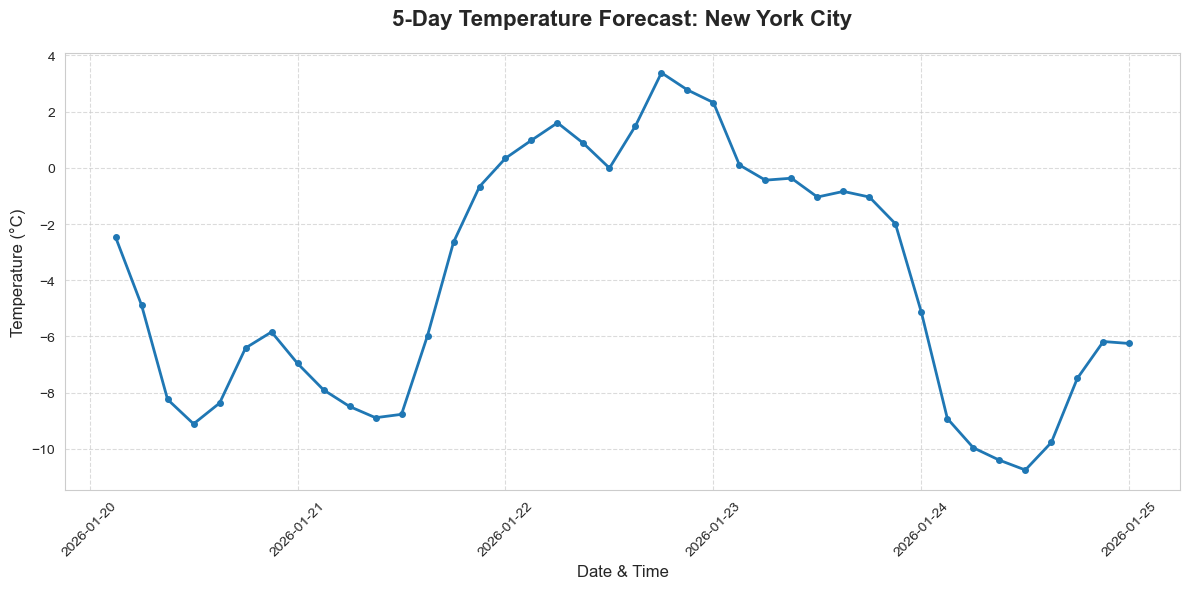

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_final['date'], df_final['temperature'], 
         marker='o',          
         linestyle='-',          
         linewidth=2, 
         markersize=4)

plt.title('5-Day Temperature Forecast: New York City', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date & Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(rotation=45)                    
plt.tight_layout()     

In [75]:
plt.savefig('ny_temp_forecast.png')

<Figure size 640x480 with 0 Axes>

In [76]:
df_final.to_csv('nyc_weather_forecast.csv', index=False)

<h2>Scraping Data from openaq</h2>

In [77]:
pip install openaq

Note: you may need to restart the kernel to use updated packages.


In [78]:
from openaq import OpenAQ
from openaq import OpenAQ

In [79]:
client = OpenAQ(api_key="dc8dea05ee271312e810a2c537dc26ce1c057dfb0cfa420225a5c447b2f429a7")

In [80]:
parameters = client.parameters.list(limit=100)
print(parameters)

ParametersResponse(headers=Headers(x_ratelimit_limit=60, x_ratelimit_remaining=59, x_ratelimit_used=1, x_ratelimit_reset=60), meta=Meta(name='openaq-api', website='/', page=1, limit=100, found=46), results=[Parameter(id=1, name='pm10', units='µg/m³', display_name='PM10', description='Particulate matter less than 10 micrometers in diameter mass concentration'), Parameter(id=2, name='pm25', units='µg/m³', display_name='PM2.5', description='Particulate matter less than 2.5 micrometers in diameter mass concentration'), Parameter(id=3, name='o3', units='µg/m³', display_name='O₃ mass', description='Ozone mass concentration'), Parameter(id=4, name='co', units='µg/m³', display_name='CO mass', description='Carbon Monoxide mass concentration'), Parameter(id=5, name='no2', units='µg/m³', display_name='NO₂ mass', description='Nitrogen Dioxide mass concentration'), Parameter(id=6, name='so2', units='µg/m³', display_name='SO₂ mass', description='Sulfur Dioxide mass concentration'), Parameter(id=7, n

In [81]:
#Finding locations that have PM2.5 and temperature data

locations = client.locations.list(limit=200)
locations_with_both = []

for location in locations.results:
    pm25_sensor = None
    temp_sensor = None
    
    for sensor in location.sensors:
        if sensor.parameter.name == 'pm25':
            pm25_sensor = sensor.id
        if sensor.parameter.name == 'temperature':
            temp_sensor = sensor.id
    
    if pm25_sensor and temp_sensor:
        locations_with_both.append({
            'country_name': location.country.name,
            'location_name': location.name,
            'pm25_sensor': pm25_sensor,
            'temp_sensor': temp_sensor
        })
        print(f"{location.country.name} - {location.name}")

India - R K Puram, Delhi - DPCC
India - Punjabi Bagh, Delhi - DPCC
India - Anand Vihar, New Delhi - DPCC


In [82]:
#Finding measurements data for locations with PM2.5 and temperature
all_data = []

for loc in locations_with_both:
    pm25_measurements = client.measurements.list(sensors_id=int(loc['pm25_sensor']), limit=500)
    for m in pm25_measurements.results:
        all_data.append({
            'location': loc['location_name'],
            'parameter': 'pm25',
            'value': m.value,
            'datetime': m.period.datetime_from.utc
        })
    temp_measurements = client.measurements.list(sensors_id=int(loc['temp_sensor']), limit=500)
    for m in temp_measurements.results:
        all_data.append({
            'location': loc['location_name'],
            'parameter': 'temperature',
            'value': m.value,
            'datetime': m.period.datetime_from.utc
        })


# Create DataFrame
df = pd.DataFrame(all_data)

In [83]:
#the correlation between air pollution and temperature
pm25 = df[df['parameter'] == 'pm25'].rename(columns={'value': 'pm25_value'})
temp = df[df['parameter'] == 'temperature'].rename(columns={'value': 'temp_value'})

merged = pd.merge(
    pm25[['location', 'datetime', 'pm25_value']],
    temp[['location', 'datetime', 'temp_value']],
    on=['location', 'datetime']
)

# Calculate correlation
correlation = merged['pm25_value'].corr(merged['temp_value'])
print(f"Overall PM2.5 vs Temperature Correlation: {correlation:.3f}\n")

# Summary statistics
print(pm25.groupby('location')['pm25_value'].agg(['mean', 'min', 'max']).round(1))

Overall PM2.5 vs Temperature Correlation: -0.224

                                mean   min    max
location                                         
Anand Vihar, New Delhi - DPCC  163.2  36.0  802.0
Punjabi Bagh, Delhi - DPCC      82.8  25.0  180.0
R K Puram, Delhi - DPCC        124.9  14.0  283.0


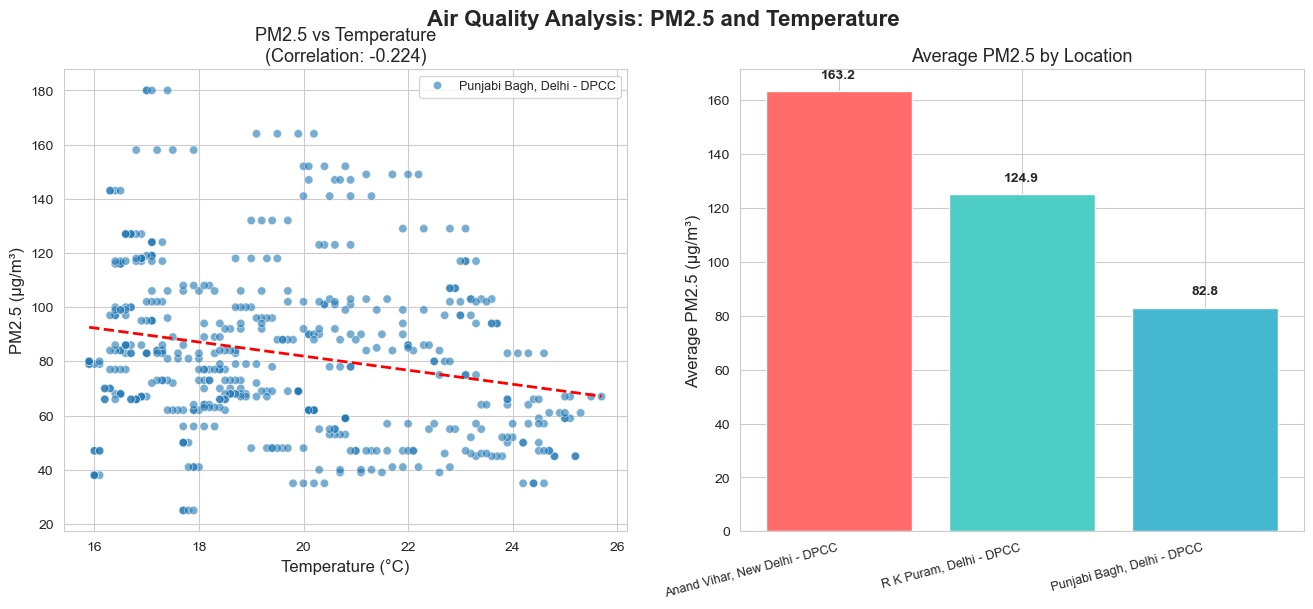

<Figure size 640x480 with 0 Axes>

 Correlation of -0.224 and the trend line suggests PM2.5 decreases as temperature increases


In [84]:
#Visualising this correlation
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Air Quality Analysis: PM2.5 and Temperature', fontsize=16, fontweight='bold')

# Scatter plot with trend line
ax1 = axes[0]
sns.scatterplot(data=merged, x='temp_value', y='pm25_value', hue='location', alpha=0.6, ax=ax1)
z = np.polyfit(merged['temp_value'], merged['pm25_value'], 1)
p = np.poly1d(z)
ax1.plot(merged['temp_value'].sort_values(), p(merged['temp_value'].sort_values()), "r--", linewidth=2)
ax1.set_xlabel('Temperature (°C)', fontsize=12)
ax1.set_ylabel('PM2.5 (µg/m³)', fontsize=12)
ax1.set_title(f'PM2.5 vs Temperature\n(Correlation: {correlation:.3f})', fontsize=13)
ax1.legend(fontsize=9)

# Bar chart
ax2 = axes[1]
pm25_avg = pm25.groupby('location')['pm25_value'].mean().sort_values(ascending=False)
bars = ax2.bar(range(len(pm25_avg)), pm25_avg.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_xticks(range(len(pm25_avg)))
ax2.set_xticklabels(pm25_avg.index, rotation=15, ha='right', fontsize=9)
ax2.set_ylabel('Average PM2.5 (µg/m³)', fontsize=12)
ax2.set_title('Average PM2.5 by Location', fontsize=13)

for bar, value in zip(bars, pm25_avg.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', fontsize=10, fontweight='bold')

plt.savefig('air_quality_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('air_quality_analysis.pdf', bbox_inches='tight')
plt.show()  # Show comes AFTER saving

plt.tight_layout()
plt.show()

print(f" Correlation of {correlation:.3f} and the trend line suggests PM2.5 decreases as temperature increases")

In [85]:
plt.savefig('air_quality_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('air_quality_analysis.pdf', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

<h2>Using the temperature data to predict bike rentals

In [86]:
bikeshare = pd.read_csv('bikeshare.csv')

In [87]:
bikeshare.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


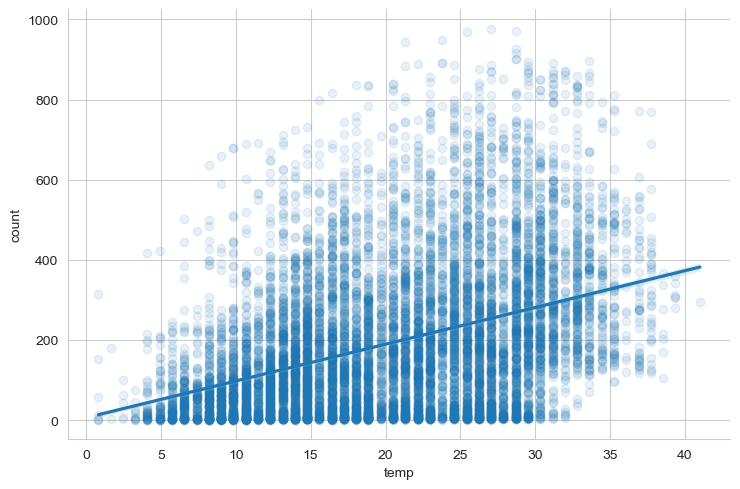

In [88]:
# Seaborn scatterplot with regression line for bikeshare
sns.lmplot(x='temp', y='count', data=bikeshare, aspect=1.5, scatter_kws={'alpha':0.1})
plt.show()

In [89]:
bikeshare.rename(columns={'count':'total_rentals'}, inplace=True)

In [90]:
feature_cols = ['temp']
X = bikeshare[feature_cols]
y = bikeshare.total_rentals

In [91]:
# Check X's datatype

print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [92]:
# Check y's datatype

print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [93]:
print(X.shape)

(10886, 1)


In [94]:
#Start linear regression on the bikshare dataset
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [95]:
lr.fit(X, y)

LinearRegression()

In [96]:
print(lr.intercept_)
print(lr.coef_)

6.046212959613712
[9.17054048]


In [97]:
total_rental = lr.intercept_ + (lr.coef_ * bikeshare.temp)
print(f"total_rental = {lr.intercept_} + {lr.coef_} * temp")

total_rental = 6.046212959613712 + [9.17054048] * temp


In [98]:
# Estimating bike rentals when temperature is 25 is:

print(f" Bike rentals when temperature is 25 is estimated to be around {round(lr.coef_[0] * 25 + lr.intercept_)} bikes")

 Bike rentals when temperature is 25 is estimated to be around 235 bikes


In [99]:
nyc_forecast = pd.read_csv('nyc_weather_forecast.csv')

In [100]:
nyc_forecast.head()

,date,temperature
0,2026-01-20 03:00:00,-2.47
1,2026-01-20 06:00:00,-4.89
2,2026-01-20 09:00:00,-8.24
3,2026-01-20 12:00:00,-9.11
4,2026-01-20 15:00:00,-8.37


In [101]:
nyc_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         40 non-null     object 
 1   temperature  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [102]:
nyc_forecast['date'] = pd.to_datetime(nyc_forecast['date'])

In [103]:
nyc_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         40 non-null     datetime64[ns]
 1   temperature  40 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 772.0 bytes


In [104]:
predicted_rentals = []
for temp in nyc_forecast['temperature']:
    prediction = round(lr.coef_[0] * temp + lr.intercept_)
    predicted_rentals.append(prediction)

In [105]:
nyc_forecast['predicted_rentals'] = predicted_rentals

In [106]:
nyc_forecast

,date,temperature,predicted_rentals
0,2026-01-20 03:00:00,-2.47,-17
1,2026-01-20 06:00:00,-4.89,-39
2,2026-01-20 09:00:00,-8.24,-70
3,2026-01-20 12:00:00,-9.11,-77
4,2026-01-20 15:00:00,-8.37,-71
5,2026-01-20 18:00:00,-6.41,-53
6,2026-01-20 21:00:00,-5.84,-48
7,2026-01-21 00:00:00,-6.96,-58
8,2026-01-21 03:00:00,-7.90,-66
9,2026-01-21 06:00:00,-8.49,-72


We now have some predictions for how bike rentals might look if we open the bike shop in the nyc weather.

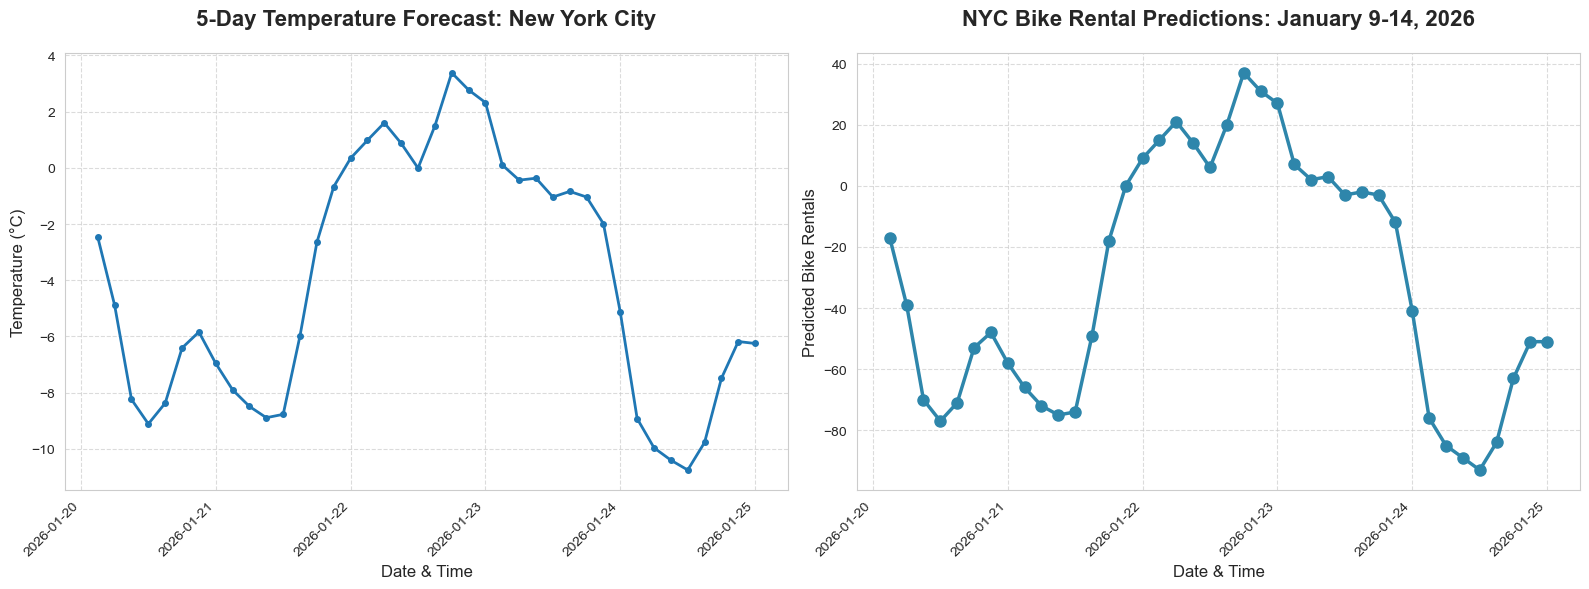

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Temperature Forecast
ax1.plot(nyc_forecast['date'], nyc_forecast['temperature'], 
         marker='o', linestyle='-', linewidth=2, markersize=4)
ax1.set_title('5-Day Temperature Forecast: New York City', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date & Time', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Predicted Rentals
ax2.plot(nyc_forecast['date'], nyc_forecast['predicted_rentals'], 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax2.set_title('NYC Bike Rental Predictions: January 9-14, 2026', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Date & Time', fontsize=12)
ax2.set_ylabel('Predicted Bike Rentals', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.savefig('NYC_bike_rental.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()